In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10

In [14]:
unusuals_df = pd.read_csv("CompleteHatAndPricingData.csv")
unusuals_df = unusuals_df[unusuals_df.columns.drop("Unnamed: 0")]
unusuals_train_df = unusuals_df[~unusuals_df["Price"].isnull()]

In [16]:
predictions_df = pd.read_csv("Predictions.csv")
predictions_df = predictions_df[predictions_df.columns.drop("Unnamed: 0")]

In [48]:
%%capture --no-stdout
unusuals_train_df["Estimate"] = "Actual Price"
predictions_df["Estimate"] = "Predicted Price"
complete_unusuals_df = pd.concat([unusuals_train_df,predictions_df],axis = 0)

In [269]:
complete_unusuals_df

Class  Crate Cosmetic                  Effect  Effect Community Rating  \
0      Heavy            True          Burning Flames                  4.59375   
2      Heavy            True     Circling Peace Sign                  2.21875   
3      Heavy            True        Circling TF Logo                  2.34375   
4      Heavy            True          Green Confetti                  1.40625   
5      Heavy            True            Green Energy                  4.15625   
...      ...             ...                     ...                      ...   
24688  Medic           False  Magnetic Hat Protector                  2.15625   
24689  Medic           False   Voltaic Hat Protector                  2.09375   
24690  Medic           False          Galactic Codex                  1.43750   
24691  Medic           False           Ancient Codex                  1.46875   
24692  Medic           False                  Nebula                  4.87500   

       Effect Median Price  Effect Rating Equip Region         Estimate  \
0                   104.00            1.6      Regular     Actual Price   
2                    22.00           -0.4      Regular     Actual Price   
3                    21.50           -0.5      Regular     Actual Price   
4                    17.00           -0.5      Regular     Actual Price   
5                    50.00            0.1      Regular     Actual Price   
...                    ...            ...          ...              ...   
24688                20.50            NaN      Regular  Predicted Price   
24689                52.50            NaN      Regular  Predicted Price   
24690                36.75            NaN      Regular  Predicted Price   
24691                19.50            NaN      Regular  Predicted Price   
24692               180.00            NaN      Regular  Predicted Price   

      Generation      Grade  Hat Median Price  Hat Rating Item Type  \
0      First Gen   No Grade              14.0       -7.40  Cosmetic   
2      First Gen   No Grade              14.0       -1.20  Cosmetic   
3      First Gen   No Grade              14.0       -1.25  Cosmetic   
4      First Gen   No Grade              14.0       -0.80  Cosmetic   
5      First Gen   No Grade              14.0       -3.50  Cosmetic   
...          ...        ...               ...         ...       ...   
24688   Invasion  Mercenary              22.0         NaN  Cosmetic   
24689   Invasion  Mercenary              22.0         NaN  Cosmetic   
24690   Invasion  Mercenary              22.0         NaN  Cosmetic   
24691   Invasion  Mercenary              22.0         NaN  Cosmetic   
24692   Invasion  Mercenary              22.0         NaN  Cosmetic   

       Median Effect Rating  Median Hat Rating  \
0                    6.7375            -1.6000   
2                   -0.8500            -1.6000   
3                   -0.9125            -1.6000   
4                   -1.3750            -1.6000   
5                    1.8375            -1.6000   
...                     ...                ...   
24688               -0.9000            -0.1625   
24689               -1.1750            -0.1625   
24690               -1.1000            -0.1625   
24691               -1.2500            -0.1625   
24692               14.5000            -0.1625   

       Months Since Last Price Update        Name      Price   Robo  \
0                                   9  Dread Knot  30.000000  False   
2                                  21  Dread Knot  10.000000  False   
3                                  44  Dread Knot   9.000000  False   
4                                  15  Dread Knot   9.000000  False   
5                                  15  Dread Knot  15.000000  False   
...                               ...         ...        ...    ...   
24688                              -1  Snowcapped  19.998430  False   
24689                              -1  Snowcapped  18.809652  False   
24690                              -1  S

In [50]:
print(complete_unusuals_df["Unboxed From"].value_counts().to_string())

Old Series                       10185
Multi/All Crate                   3492
Pyro Crate                        2522
Demoman Crate                     2134
Soldier Crate                     2037
Medic Crate                       1746
Heavy Crate                       1746
Not Unboxable                     1649
Scout Crate                       1552
Engineer Crate                    1455
Sniper Crate                      1261
Spy Crate                         1164
Creepy Crawly                     1067
Winter 2017 Cosmetic               970
Gun Mettle Cosmetic                873
Rainy Day Cosmetic                 776
Winter 2018 Cosmetic               776
Violet Vermin                      776
Unusualifier                       714
Unleash the Beast Cosmetic         679
Abominable Cosmetic                679
Gargoyle                           582
Unlocked Winter 2016 Cosmetic      485
Mayflower Cosmetic                 485
Blue Moon Cosmetic                 485
Tough Break Cosmetic     

In [51]:
print(complete_unusuals_df["Generation"].value_counts().to_string())

First Gen           5852
Halloween 2018      4808
Robotic Boogaloo    4180
Invasion            3762
Halloween 2013      3344
Second Gen          3344
Third Gen           2926
Halloween 2015      2926
Halloween 2014      2578
Halloween 2012      2090
Halloween 2016      1812
Halloween 2011      1672
End of the Line     1672
Love & War           315


Invasion Cases = 1/2/3 + invasion effects
Tough Break = 1/2/3
Blue Moon = 1/2/3
Mayflower = 1/2/3
winter 2016 = 1/2/3
Gargoyle = 1/2/3 + halloween 2015
Abominable = 1/2/3
Unleash the beast = 1/2/3
unusualifier = o.g. taunt effects
voilet vermin = 1/2/3 + halloween 2018
rainy day = 1/2/3
gun mettle  = 1/2/3
winter 2017 = 1/2/3
creepy crawley = 1/2/3 + halloween 2016
all unlocked = 1/2/3

In [95]:
complete_unusuals_df[complete_unusuals_df["Unboxed From"] == "Unusualifier"]["Generation"].value_counts()

Love & War        306
Halloween 2018    204
Halloween 2016    136
Halloween 2014     68
Name: Generation, dtype: int64

In [188]:
simulate_unboxing("Multi/All Crate")

(98.12064562708122, 9913, -68325.22474685963)

In [320]:
def simulate_unboxing(crate_name,halloween = False,reps = 1000000,crate_price = 0.05,key_price = 2.50):
    
    if halloween:
        effect_generations_for_simulation = ["Halloween 2011","Halloween 2012","Halloween 2013","Halloween 2014","Halloween 2016","Halloween 2018"]
        taunt_generations_for_simulation = ["Halloween 2014","Halloween 2016","Halloween 2018"]
    else:
        effect_generations_for_simulation = ["First Gen","Second Gen","Third Gen"]
        taunt_generations_for_simulation = ["Love & War"]
        
    grades = True

    if "Crate" in crate_name:
        grades = False
    elif "Old Series" in crate_name:
        grades = False
    elif "End of the Line" in crate_name:
        grades = False
        effect_generations_for_simulation = ["End of the Line"]
        crate_name = "Old Series"
    elif "Robotic Boogaloo" in crate_name:
        grades = False
        effect_generations_for_simulation = ["Robotic Boogaloo"]
        crate_name = "Old Series"
    
    extra_effects_map = ({"Confidential Collection" : "Invasion","Quarantined Collection" : "Invasion", "Gargoyle" : "Halloween 2015",
                        "Creepy Crawley" : "Halloween 2016","Violet Vermin" : "Halloween 2018"})
    if crate_name in extra_effects_map:
        effect_generations_for_simulation.append(extra_effects_map[crate_name])
        
        
    if crate_name == "Old Series":
        possible_unboxes_df = pd.DataFrame()
        for generation in effect_generations_for_simulation:
            to_add = complete_unusuals_df[(complete_unusuals_df["Generation"] == generation) & (complete_unusuals_df["Crate Cosmetic"])]
            possible_unboxes_df = pd.concat([possible_unboxes_df,to_add],axis = 0)
    else:   
        possible_unboxes_df = pd.DataFrame()
        for generation in effect_generations_for_simulation:
            to_add = complete_unusuals_df[(complete_unusuals_df["Generation"] == generation) & (complete_unusuals_df["Unboxed From"] == crate_name)]
            possible_unboxes_df = pd.concat([possible_unboxes_df,to_add],axis = 0)
                                             
    hat_unbox_prices = []
    
    num_hats_unboxed = 0
    num_taunts_unboxed = 0
    
    average_hat_unbox_value = 0
    average_taunt_unbox_value = 0
    
    money_spent = key_price * reps + crate_price * reps
    money_earned = 0
    
    if(grades):
        
        taunt_unbox_prices = []
        
        possible_taunt_unboxes_df = pd.DataFrame()
        for generation in taunt_generations_for_simulation:
            to_add = complete_unusuals_df[(complete_unusuals_df["Generation"] == generation) & (complete_unusuals_df["Unboxed From"] == "Unusualifier")]
            possible_taunt_unboxes_df = pd.concat([possible_taunt_unboxes_df,to_add],axis = 0)
        
        mercenary_percent = 79.92327 + 0.25575
        commando_percent = mercenary_percent + 15.98465
        assassin_percent = commando_percent + 3.19693
        elite_percent = assassin_percent + 0.63939
        
        mercenary_prices = np.array(possible_unboxes_df[possible_unboxes_df["Grade"] == "Mercenary"]["Price"])
        commando_prices = np.array(possible_unboxes_df[possible_unboxes_df["Grade"] == "Commando"]["Price"])
        assassin_prices = np.array(possible_unboxes_df[possible_unboxes_df["Grade"] == "Assassin"]["Price"])
        elite_prices = np.array(possible_unboxes_df[possible_unboxes_df["Grade"] == "Elite"]["Price"])
        
        taunt_prices = np.array(possible_taunt_unboxes_df["Price"])
        
        if len(commando_prices) <= 0:
            commando_prices = mercenary_prices
        if len(assassin_prices) <= 0:
            assassin_prices = mercenary_prices
        if len(elite_prices) <= 0:
            elite_prices = mercenary_prices
        
        for unbox in range(0,reps):
            hat_opened = random.randint(0,100)
            taunt_opened = random.randint(0,100)
            
            if hat_opened == 1: #unusual unboxed
                res = random.uniform(0,100)
                num_hats_unboxed = num_hats_unboxed + 1

                if res <= mercenary_percent:
                    #mercenary grade
                    random_number = random.randint(0,len(mercenary_prices)-1)
                    hat_unbox_prices.append(mercenary_prices[random_number])

                elif res <= commando_percent:
                    #commando grade
                    random_number = random.randint(0,len(commando_prices)-1)
                    hat_unbox_prices.append(commando_prices[random_number])

                elif res <= assassin_percent:
                    #assassin grade
                    random_number = random.randint(0,len(assassin_prices)-1)
                    hat_unbox_prices.append(assassin_prices[random_number])

                elif res <= elite_percent:
                    #elite grade
                    random_number = random.randint(0,len(elite_prices)-1)
                    hat_unbox_prices.append(elite_prices[random_number])
                        
            if taunt_opened == 1: #taunt unboxed
                
                num_taunts_unboxed = num_taunts_unboxed + 1
                
                random_number = random.randint(0,len(taunt_prices)-1)
                taunt_unbox_prices.append(taunt_prices[random_number])
                
        if num_hats_unboxed != 0:
            money_earned = money_earned + np.array(hat_unbox_prices).sum() * key_price
            average_hat_unbox_value = np.array(hat_unbox_prices).sum()/num_hats_unboxed
        if num_taunts_unboxed != 0:
            money_earned = money_earned + np.array(taunt_unbox_prices).sum() * key_price
            average_taunt_unbox_value = np.array(taunt_unbox_prices).sum()/num_taunts_unboxed
        return average_hat_unbox_value, average_taunt_unbox_value,num_hats_unboxed,num_taunts_unboxed,(money_earned-money_spent)/reps
        
    else:
        no_grade_prices = np.array(possible_unboxes_df[possible_unboxes_df["Grade"] == "No Grade"]["Price"])
        
        for unbox in range(0,reps):
            hat_opened = random.randint(0,100)
            
            if hat_opened == 1: #hat unboxed
                num_hats_unboxed = num_hats_unboxed + 1

                random_number = random.randint(0,len(no_grade_prices)-1)
                hat_unbox_prices.append(no_grade_prices[random_number])
                
        if num_hats_unboxed != 0:
            money_earned = money_earned + np.array(hat_unbox_prices).sum() * key_price
            average_hat_unbox_value = np.array(hat_unbox_prices).sum()/num_hats_unboxed
        return average_hat_unbox_value,np.nan,num_hats_unboxed,np.nan,(money_earned-money_spent)/reps

        
    return possible_unboxes_df

In [321]:
crates = complete_unusuals_df[["Crate Cosmetic","Unboxed From"]]
crates = list(crates["Unboxed From"].unique())
crates.remove("Unusualifier")
crates.remove("Not Unboxable")
crates.append("End of the Line")
crates.append("Robotic Boogaloo")
crates

['Old Series',
 'Multi/All Crate',
 'Demoman Crate',
 'Engineer Crate',
 'Heavy Crate',
 'Soldier Crate',
 'Spy Crate',
 'Pyro Crate',
 'Medic Crate',
 'Scout Crate',
 'Sniper Crate',
 'Gun Mettle Cosmetic',
 'Confidential Collection',
 'Quarantined Collection',
 'Gargoyle',
 'Tough Break Cosmetic',
 'Mayflower Cosmetic',
 'Creepy Crawly',
 'Unlocked Winter 2016 Cosmetic',
 'Rainy Day Cosmetic',
 'Abominable Cosmetic',
 'Unleash the Beast Cosmetic',
 'Winter 2017 Cosmetic',
 'Blue Moon Cosmetic',
 'Violet Vermin',
 'Winter 2018 Cosmetic',
 'End of the Line',
 'Robotic Boogaloo']

In [322]:
results = []

for crate in crates:
    unboxing_result = simulate_unboxing(crate)
    results.append([crate,unboxing_result[0],unboxing_result[1],unboxing_result[2],unboxing_result[3],unboxing_result[4]])
                   
unboxing_df = pd.DataFrame(results)

In [323]:
unboxing_df =unboxing_df.rename(columns={0: "Crate/Case Name",1:"Average Hat Unbox Value",2:"Average Taunt Unbox Value",
                           3:"Num Hats Unboxed",4:"Num Taunts Unboxed",5:"Average Money Lost Per Unbox"}).set_index("Crate/Case Name")

In [324]:
unboxing_df["Average Total Unbox Value"] = unboxing_df.apply(
    lambda row: (row["Average Hat Unbox Value"] + row["Average Taunt Unbox Value"]) if not pd.isnull(row["Average Taunt Unbox Value"]) else row["Average Hat Unbox Value"],
    axis=1)

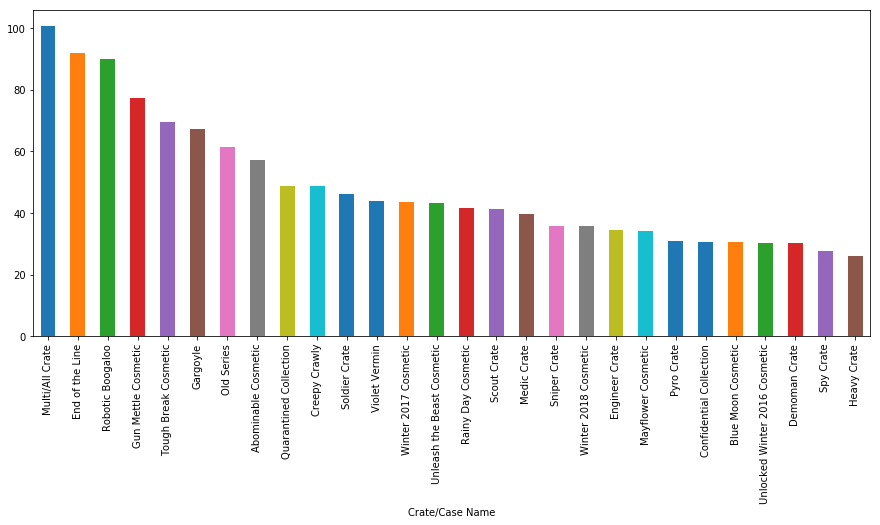

In [325]:
unboxing_df["Average Total Unbox Value"].sort_values(ascending = False).plot.bar(figsize = (15,6))

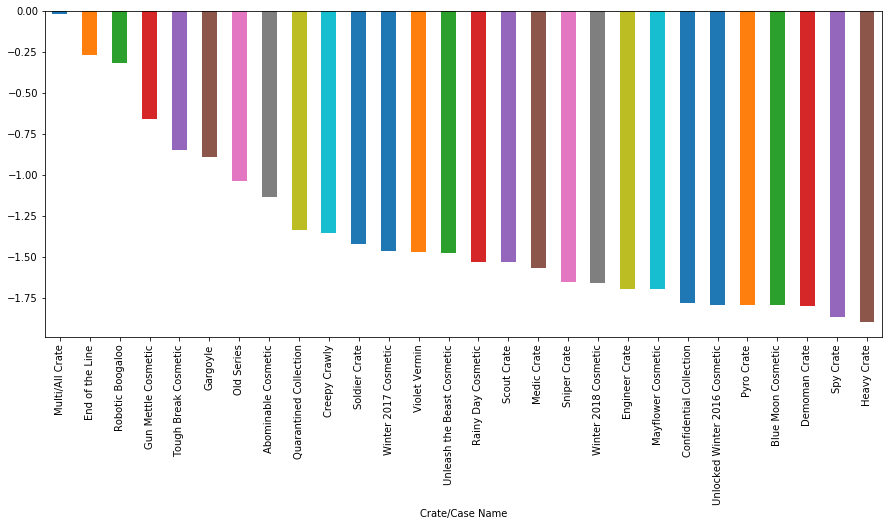

In [326]:
unboxing_df["Average Money Lost Per Unbox"].sort_values(ascending = False).plot.bar(figsize = (15,6))